#  Extrovert vs. Introvert Personality Prediction using Logistic Regression

##  Problem Statement

Use the **Extrovert vs. Introvert Personality Traits Dataset** to build a binary classification model using **Logistic Regression** that predicts whether a person is an **extrovert** or not.

---

##  Step-by-Step Tasks

### 1. Data Loading & Basic Exploration
- Load the dataset using `pandas`.
- View the first few rows and check column names and data types.
- Check the shape of the dataset (rows × columns).

### 2. Data Cleaning
-  Check and handle **missing values** (nulls).
-  Remove any **duplicate rows**.
-  Detect and treat **outliers** using:
  - `sns.boxplot()` for each feature
  - IQR method (optional)
-  Analyze the **distribution** of each numerical feature using:
  - `sns.histplot()` or `sns.kdeplot()` (previously `distplot`)

### 3. Target Variable Encoding
- Encode the `Personality` column:
  - `Extrovert` → 1  
  - `Introvert` → 0

### 4. Define Features and Target
-  **Target Variable:**  
  - `Personality` (binary: 0 or 1)

-  **Feature Variables:**  
  - `Time_spent_Alone`  
  - `Stage_fear`  
  - `Social_event_attendance`  
  - `Going_outside`  
  - `Drained_after_socializing`  
  - `Friends_circle_size`  
  - `Post_frequency`

### 5. Exploratory Data Analysis (EDA)

-  **Distribution Plots:**
  - Use `sns.histplot()` or `sns.kdeplot()` to check how each feature is distributed.
  - Helps understand skewness and variability.

-  **Box Plots:**
  - Use `sns.boxplot()` to identify outliers in each feature.
  - Also use boxplot to compare each feature across personality types (0 vs. 1).

-  **Scatter Plots:**
  - Use `sns.scatterplot()` to visualize relationships between pairs of features.
  - Use `hue='Personality'` to color by class.

-  **Heatmap (Correlation Matrix):**
  - Use `sns.heatmap()` to visualize correlation between features.
  - Identify strongly correlated features.

-  **Feature vs. Target Relationship:**
  - Use `boxplot` grouped by `Personality` to see feature impact.
  - Use `groupby('Personality').mean()` to summarize feature differences.

### 6. Feature Scaling
- Use `StandardScaler` from `sklearn.preprocessing` to scale numerical features.
-  **Important:** Perform **VIF calculation after scaling** the features.

### 7. Multicollinearity Check
-  Use **VIF (Variance Inflation Factor)** to detect multicollinearity.
-  **Note:** VIF is applied only on **feature variables**, not the target.
- Drop or combine features with **VIF > 5** if needed.

### 8. Train-Test Split
- Use `train_test_split()` to split data:
  - 80% for training
  - 20% for testing
- Use `random_state` for reproducibility.

### 9. Model Building
- Use `LogisticRegression` from `sklearn.linear_model` to train the model.
- Fit the model on the training set.

### 10. Model Evaluation
- Evaluate model performance using:
  -  `accuracy_score`
  -  `confusion_matrix`
  - `Training and Testng Score`
---

##  Final Goal

Build a clean and accurate logistic regression model that predicts whether a person is an **extrovert or introvert**, based on their social behavior and personality traits.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings 
warnings.filterwarnings('ignore')

# For Regression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score , confusion_matrix ,roc_auc_score

In [190]:
data=pd.read_csv('C:/Users/cmgou/Documents/Meta scifor/Test 8.0/Test 8.0/Classification Problem/Personality_Dataset.csv')

In [191]:
data.head()


,Unnamed: 0,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,4.0,No,4.0,6.0,No,13.0,5.0,1
1,1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,0
2,2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,0
3,3,0.0,No,6.0,7.0,No,14.0,8.0,1
4,4,3.0,No,9.0,4.0,No,8.0,5.0,1


In [192]:
data.shape

(2900, 9)

In [193]:
data.describe()

,Unnamed: 0,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality
count,2900.000000,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000,2900.000000
mean,1449.500000,4.505816,3.963354,3.000000,6.268863,3.564727,0.514138
std,837.302215,3.479192,2.903827,2.247327,4.289693,2.926582,0.499886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,724.750000,2.000000,2.000000,1.000000,3.000000,1.000000,0.000000
50%,1449.500000,4.000000,3.000000,3.000000,5.000000,3.000000,1.000000
75%,2174.250000,8.000000,6.000000,5.000000,10.000000,6.000000,1.000000
max,2899.000000,11.000000,10.000000,7.000000,15.000000,10.000000,1.000000


In [194]:
data.isnull().sum()

Unnamed: 0                    0
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [195]:
data.fillna(0, inplace=True)

In [196]:
data.isnull().sum()

Unnamed: 0                   0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [178]:
data.duplicated().sum()

439

In [179]:
data = data.drop_duplicates()


In [180]:
data.duplicated().sum()  # Should return 0


0

KeyError: 'Unnamed: 0'

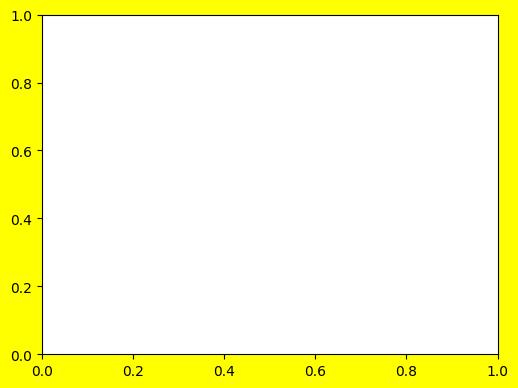

In [183]:
plt.figure(figsize=(20, 15), facecolor='yellow')
plotnumber = 1

for column in numeric_columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(data[column], kde=True)  # Use histplot instead of deprecated distplot
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.show()

KeyError: 'Unnamed: 0'

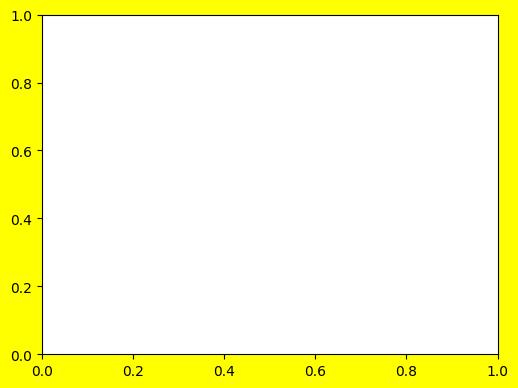

In [182]:
data['Stage_fear'] = data['Stage_fear'].map({'Yes': 1, 'No': 0})
data['Drained_after_socializing'] = data['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

In [181]:
data['Time_spent_Alone'] = data['Time_spent_Alone'].replace(0, data['Time_spent_Alone'].mean())
data['Social_event_attendance'] = data['Social_event_attendance'].replace(0, data['Social_event_attendance'].mean())
data['Going_outside'] = data['Going_outside'].replace(0, data['Going_outside'].mean())
data['Friends_circle_size'] = data['Friends_circle_size'].replace(0, data['Friends_circle_size'].mean())
data['Post_frequency'] = data['Post_frequency'].replace(0, data['Post_frequency'].mean())

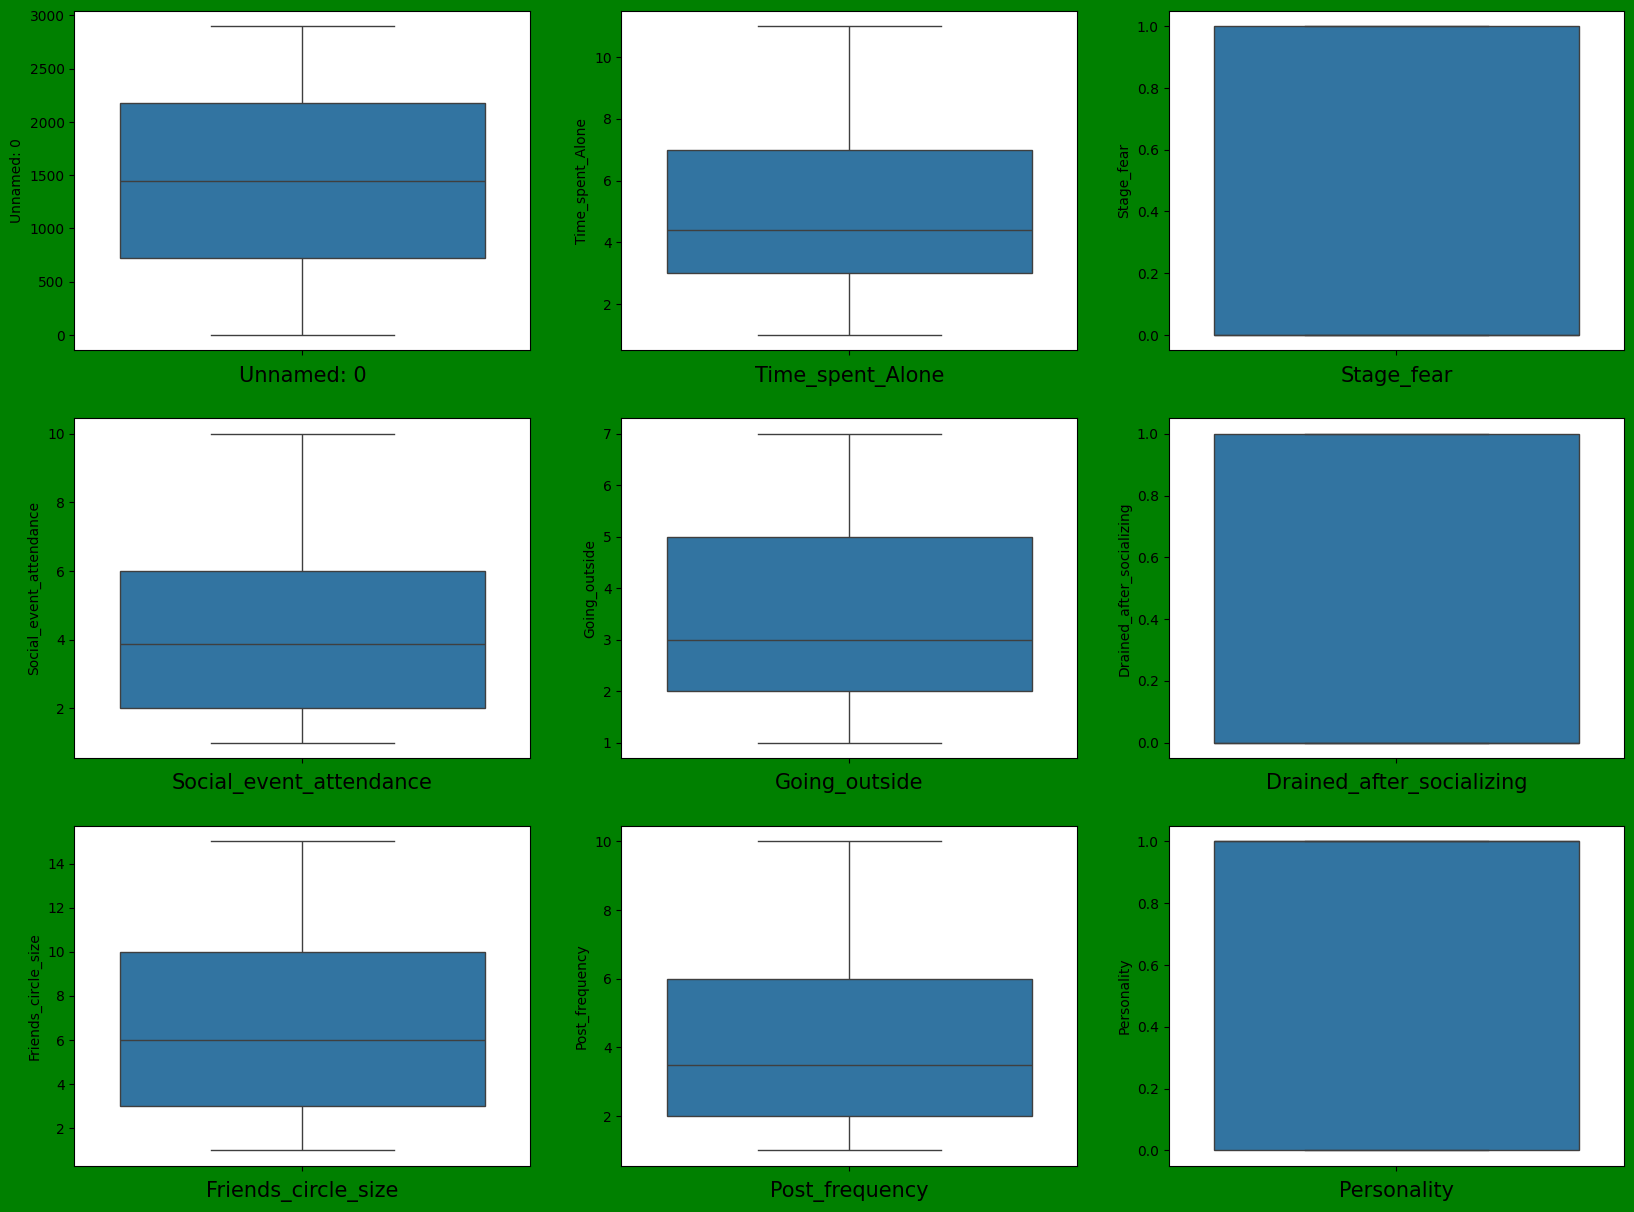

In [99]:
plt.figure(figsize=(20,15),facecolor='green')
plotnumber=1
for column in data:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        ax=sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.show()

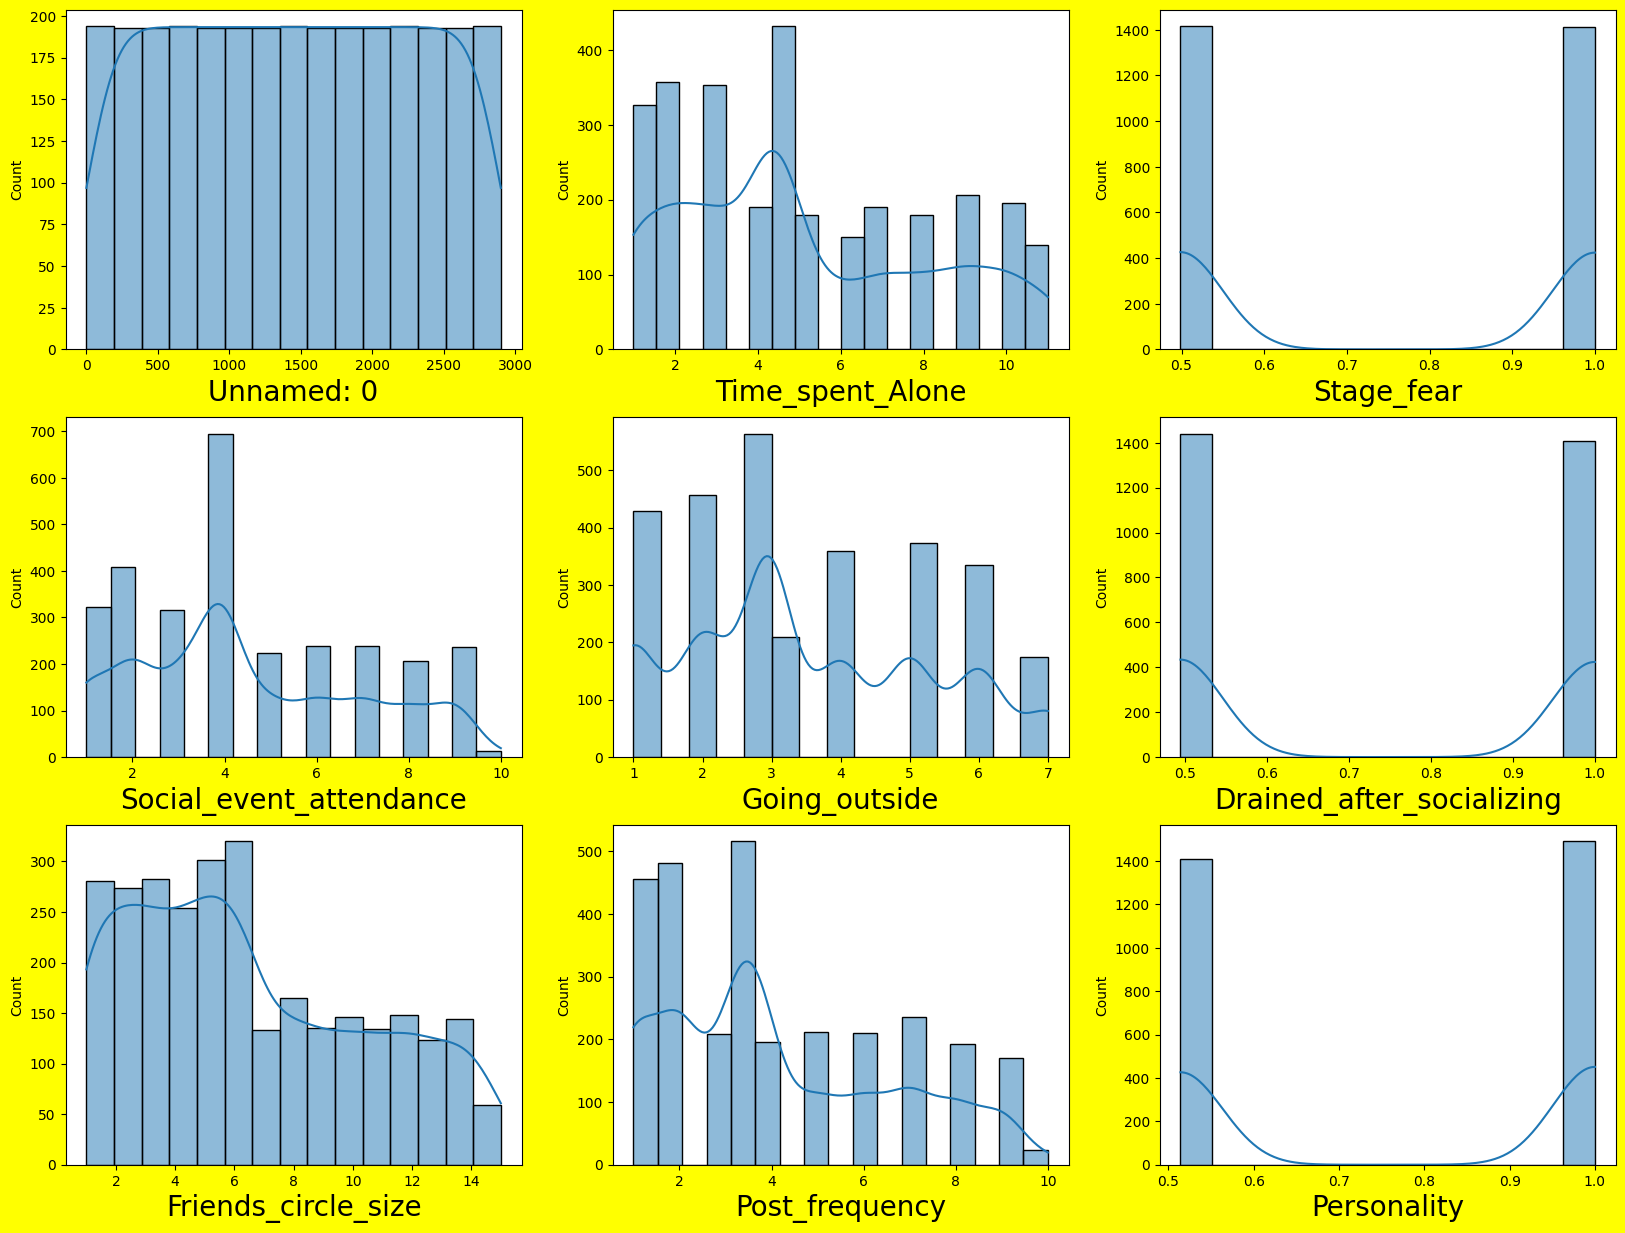

In [58]:

plt.figure(figsize=(20, 15), facecolor='yellow')
plotnumber = 1

for column in numeric_columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(data[column], kde=True)  # Use histplot instead of deprecated distplot
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.show()

In [100]:
data['Personality'] = data['Personality'].replace({'Extrovert': 1, 'Introvert': 0})

In [101]:
data.head()

,Unnamed: 0,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,4.000000,0.0,4.000000,6.000000,0.0,13.000000,5.0,1
1,1,9.000000,1.0,3.878621,2.931724,1.0,6.102414,3.0,0
2,2,9.000000,1.0,1.000000,2.000000,1.0,5.000000,2.0,0
3,3,4.407931,0.0,6.000000,7.000000,0.0,14.000000,8.0,1
4,4,3.000000,0.0,9.000000,4.000000,0.0,8.000000,5.0,1


In [79]:
# 4. Define Features and Target

# Define Target variable
Y = data['Personality']  # Target: 0 for Introvert, 1 for Extrovert

# Define feature variables
X = data[[
    'Time_spent_Alone',
    'Stage_fear',
    'Social_event_attendance',
    'Going_outside',
    'Drained_after_socializing',
    'Friends_circle_size',
    'Post_frequency'
]]


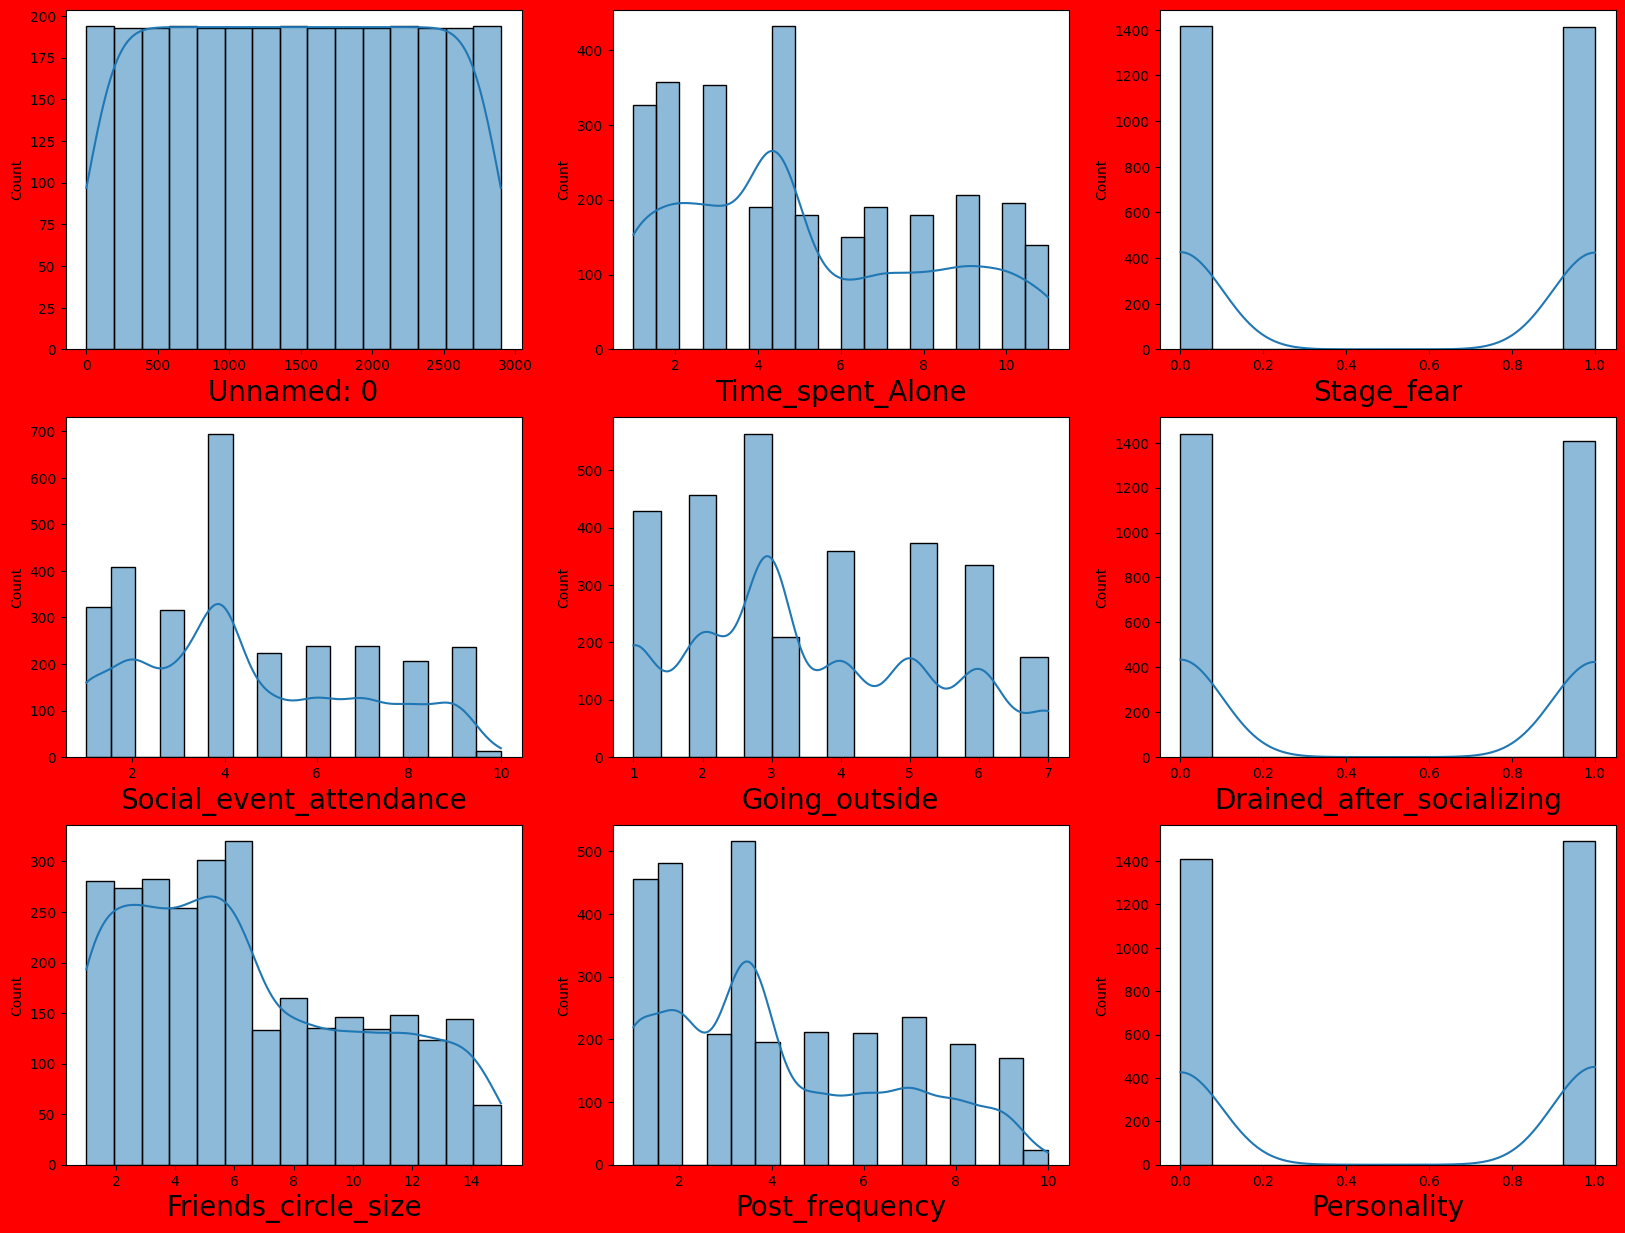

In [102]:
### 5. Exploratory Data Analysis (EDA)
# Distribution Plots:**
# Use `sns.histplot()` or `sns.kdeplot()` to check how each feature is distributed.
# Helps understand skewness and variability.


plt.figure(figsize=(20, 15), facecolor='red')
plotnumber = 1

for column in numeric_columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(data[column], kde=True)  # Use histplot instead of deprecated distplot
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.show()

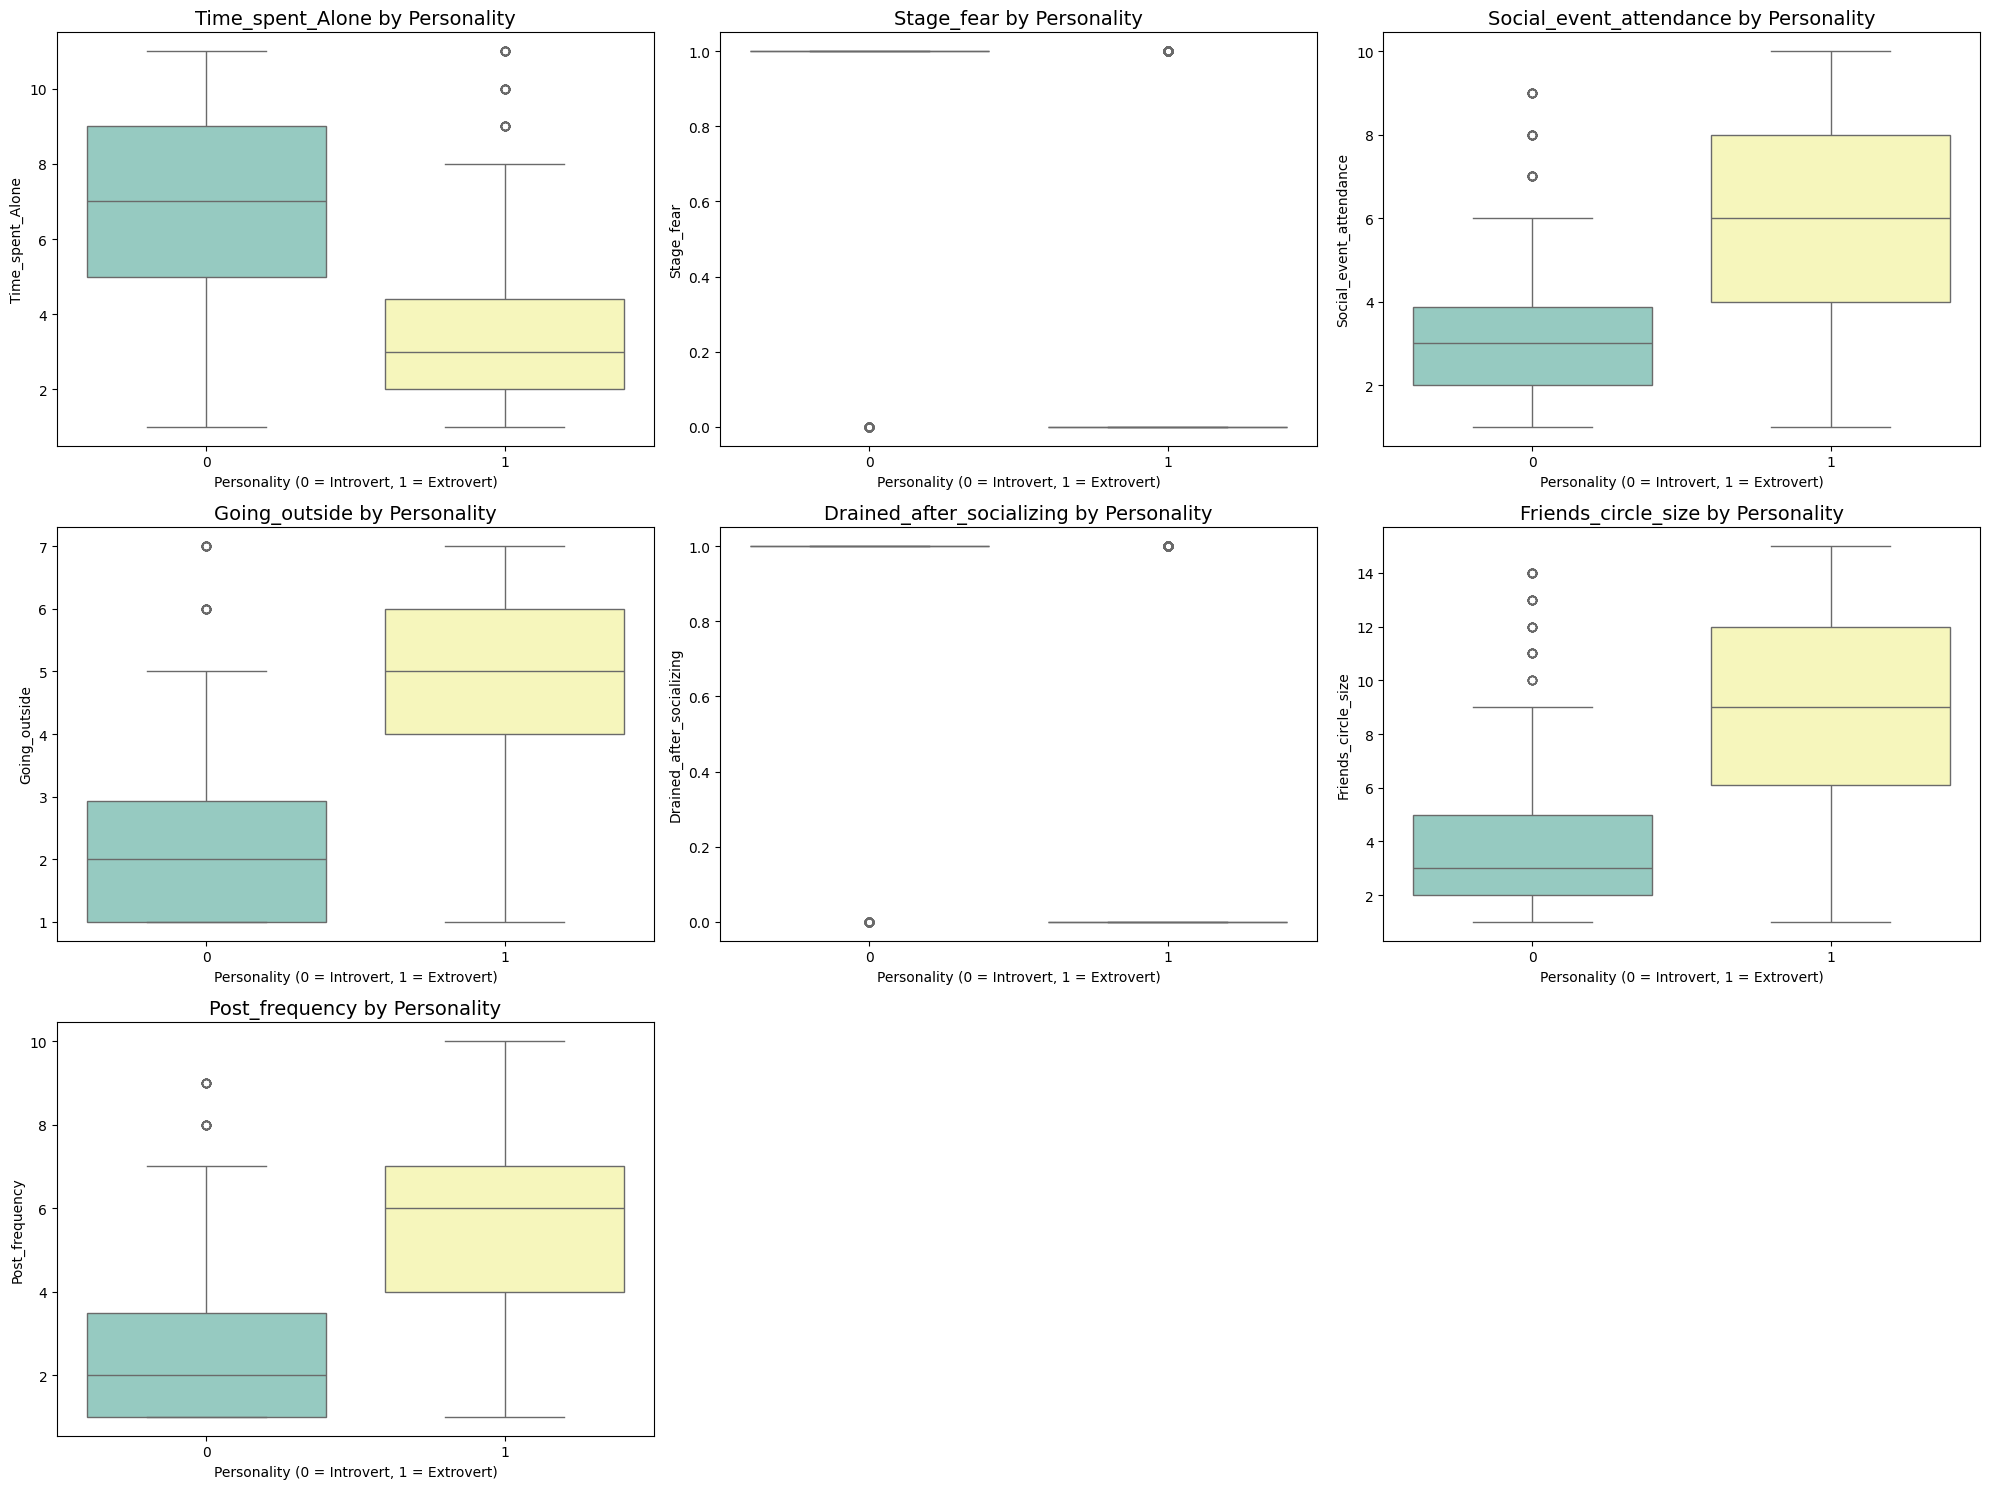

In [107]:
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in X.columns:
    if plotnumber <= 9:
        plt.subplot(3, 3, plotnumber)
        sns.boxplot(x='Personality', y=column, data=data, palette='Set3')
        plt.title(f'{column} by Personality', fontsize=14)
        plt.xlabel('Personality (0 = Introvert, 1 = Extrovert)')
        plt.ylabel(column)
        plotnumber += 1

plt.tight_layout()
plt.show()